<a href="https://colab.research.google.com/github/saiganesh9000/fml-assignment/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("/content/car_data.csv")

In [3]:
data


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [4]:
X = data.drop('Purchased', axis=1).values
y = data['Purchased'].values

In [5]:
X=data.drop('Gender',axis=1).values

In [6]:
X


array([[   385,     35,  20000,      0],
       [   681,     40,  43500,      0],
       [   353,     49,  74000,      0],
       ...,
       [   407,     28, 138500,      1],
       [   299,     48, 134000,      1],
       [   687,     44,  73500,      0]])

In [7]:
#3. Create model and train it
model = LogisticRegression(C=0.5)
model.fit(X,y)

LogisticRegression(C=0.5)

In [8]:

#attributes of your model
model.classes_

array([0, 1])

In [9]:
model.intercept_

array([-2.58836067])

In [10]:
model.coef_

array([[-1.07409907e-03, -1.02532248e-02, -8.24718237e-07,
         7.19195334e+00]])

In [11]:

#4. Evaluate the model
model.predict_proba(X)

array([[0.9669858 , 0.0330142 ],
       [0.97737525, 0.02262475],
       [0.97155581, 0.02844419],
       ...,
       [0.02264036, 0.97735964],
       [0.02460795, 0.97539205],
       [0.97891794, 0.02108206]])

In [12]:
y_pred = model.predict(X)
print(y_pred)

[0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 1 1 0 0 1 

In [13]:

#accuracy
model.score(X, y)

1.0

In [14]:

confusion_matrix(y, y_pred)

array([[598,   0],
       [  0, 402]])

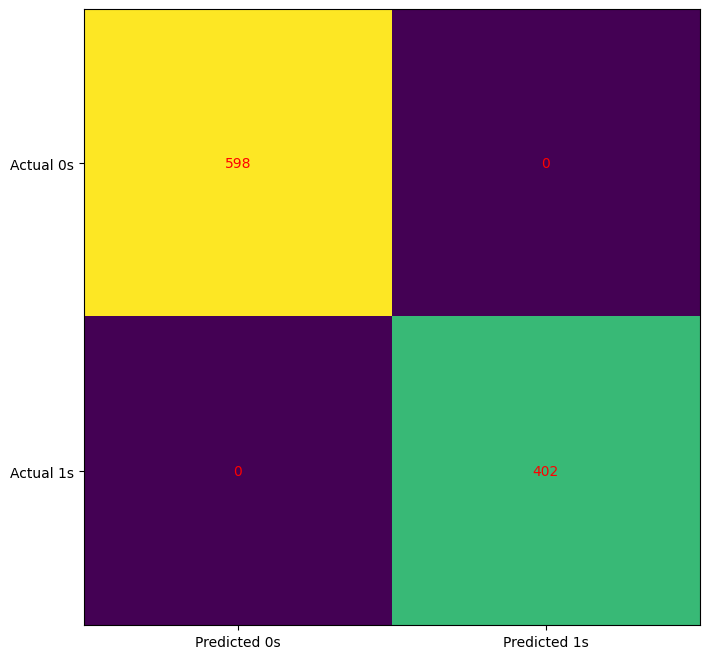

In [15]:
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [16]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       1.00      1.00      1.00       402

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



# **KNN**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [18]:
X_train.shape, X_test.shape

((800, 4), (200, 4))

In [19]:
y_train.shape, y_test.shape

((800,), (200,))

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred = knn.predict(X_test)

In [22]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.65)

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_train, y_train), knn.score(X_test, y_test))


0.83375 0.735


In [24]:
confusion_matrix(y_test, y_pred)

array([[94, 22],
       [31, 53]])

In [25]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       116
           1       0.71      0.63      0.67        84

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.73      0.73       200



# **Naive Bayes**

In [26]:
# Import LabelEncoder
from sklearn import preprocessing
#create labelEncoder
le = preprocessing.LabelEncoder()
# Convert string label into numbers.
Gen=le.fit_transform(data['Gender'].values)
print(Gen)

[1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0
 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0
 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1
 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 1 0 

In [27]:
X = np.vstack((data['User ID'].values ,Gen, data['Age'].values , data['AnnualSalary'].values)).T
y = data['Purchased'].values
X=X.reshape(-1,4)
X


array([[   385,      1,     35,  20000],
       [   681,      1,     40,  43500],
       [   353,      1,     49,  74000],
       ...,
       [   407,      0,     28, 138500],
       [   299,      0,     48, 134000],
       [   687,      0,     44,  73500]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [29]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1]


In [30]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.85
